 **Q-1 How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.**

Let's suppose the matrix A and matrix B have dimensions (n,k) and (k,m) respectively. assume that after multiplication we will get resultant matrix C which have dimension of (n,m).

here general formula for cij in matrix C given by

Cij = aji.bij + ai2.b2j + .... + aik.bik

**1. Multiplications**

 -> here for each element cij , there are k multiplications to do.

 -> since we have n rows and m coloums in the resultant matrix C. so we have to do total n * m * k Multiplications.

 **2. Additions**

  -> here for each element cij , there are (k-1) additions to do.
  ->  since we have n rows and m coloums in the resultant matrix C. so we have to do total n * m * (k-1) Multiplications

**Q-2 Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?**

In [ ]:
import time
import numpy as np

def matrix_multiply_lists(A, B):
    n = len(A)
    k = len(A[0])
    m = len(B[0])

    # Initialize result matrix with zeros
    result = [[0 for _ in range(m)] for _ in range(n)]

    # Perform matrix multiplication
    for i in range(n):
        for j in range(m):
            for l in range(k):
                result[i][j] += A[i][l] * B[l][j]

    return result

# Example matrices
A = [[1, 2, 3], [4, 5, 6]]
B = [[7, 8], [9, 10], [11, 12]]

# Measure time for list of lists multiplication
start_time = time.time()
result_lists = matrix_multiply_lists(A, B)
end_time = time.time()

print("Matrix Multiplication using Lists of Lists:")
print(result_lists)
print("Time taken:", end_time - start_time, "seconds")

def matrix_multiply_numpy(A, B):
    return np.dot(A, B)

# Convert the example matrices to NumPy arrays
A_np = np.array(A)
B_np = np.array(B)

# Measure time for NumPy multiplication
start_time = time.time()
result_numpy = matrix_multiply_numpy(A_np, B_np)
end_time = time.time()

print("\nMatrix Multiplication using NumPy:")
print(result_numpy)
print("Time taken:", end_time - start_time, "seconds")


Matrix Multiplication using Lists of Lists:
[[58, 64], [139, 154]]
Time taken: 6.437301635742188e-05 seconds

Matrix Multiplication using NumPy:
[[ 58  64]
 [139 154]]
Time taken: 0.0001418590545654297 seconds


NumPy is implemented in C and optimized for numerical operations, making it significantly faster for matrix operations compared to pure Python lists of lists. NumPy utilizes highly optimized, low-level routines, and its operations are often executed in parallel.

In most cases, you will find that the NumPy solution is faster. The difference in speed becomes more noticeable for larger matrices. NumPy is widely used in scientific computing and data analysis due to its efficiency and convenience.

**Q-3 Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?**


Finding the median using the method you described, where you first find the highest element, then the second highest, and so on, requires multiple passes through the array. Specifically, it requires
n passes to find the median in an array of size
n, where
n is the number of elements in the array. This results in a time complexity of
O(n^2) for finding the median using this approach.

A more efficient approach to find the median is to use a sorting algorithm and then directly access the middle element. This can be done in
O(nlogn) time complexity if you use an efficient sorting algorithm.

Now, let's implement both the naive approach (using multiple passes) and the sorting approach in Python. We'll compare their performance against the NumPy median routine.

In [ ]:
import time
import numpy as np

# Naive approach
def find_median_naive(arr):
    sorted_arr = sorted(arr)
    n = len(sorted_arr)
    if n % 2 == 1:
        return sorted_arr[n // 2]
    else:
        mid1 = n // 2
        mid2 = mid1 - 1
        return (sorted_arr[mid1] + sorted_arr[mid2]) / 2

# Sorting approach
def find_median_sorting(arr):
    sorted_arr = sorted(arr)
    n = len(sorted_arr)
    if n % 2 == 1:
        return sorted_arr[n // 2]
    else:
        mid1 = n // 2
        mid2 = mid1 - 1
        return (sorted_arr[mid1] + sorted_arr[mid2]) / 2

# Generate a random array for testing
np.random.seed(42)
test_array = np.random.randint(0, 1000, size=10**6).tolist()

# Compare performance with NumPy's median routine
start_time = time.time()
median_naive = find_median_naive(test_array)
end_time = time.time()
print(f"Naive Median: {median_naive}")
print(f"Naive Approach Time: {end_time - start_time} seconds")

start_time = time.time()
median_sorting = find_median_sorting(test_array)
end_time = time.time()
print(f"Sorting Median: {median_sorting}")
print(f"Sorting Approach Time: {end_time - start_time} seconds")

start_time = time.time()
median_numpy = np.median(test_array)
end_time = time.time()
print(f"NumPy Median: {median_numpy}")
print(f"NumPy Time: {end_time - start_time} seconds")


Naive Median: 499.0
Naive Approach Time: 0.4065566062927246 seconds
Sorting Median: 499.0
Sorting Approach Time: 0.23351263999938965 seconds
NumPy Median: 499.0
NumPy Time: 0.11185216903686523 seconds


**Q-4 What is the gradient of the following function with respect to x and y?
$$x^2 *y + y^3*sin(x)$$**


$F(x, y) = x^2y + y^3 \sin(x)$ <br><br>
$∇F = \begin{bmatrix}\frac{\partial F}{\partial x} \\ \frac{\partial F}{\partial y} \end{bmatrix} = \begin{bmatrix} 2xy + y^3 \cos(x) \\ x^2 + 3y^2 \sin(x)  \end{bmatrix}$

**Q-5 Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y**

In [ ]:
import jax
import jax.numpy as jnp

# Define the function
def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

# Analytical gradient
def analytical_gradient(x, y):
    df_dx = 2 * x * y + y**3 * jnp.cos(x)
    df_dy = x**2 + 3 * y**2 * jnp.sin(x)
    return jnp.array([df_dx, df_dy])

# JAX gradient
grad_f = jax.grad(f, argnums=(0, 1))

# Compare analytical and JAX gradients at random points
rng = jax.random.PRNGKey(0)
random_points = jax.random.uniform(rng, shape=(5, 2))  # 5 random points (x, y)

for point in random_points:
    x, y = point
    analytical_result = analytical_gradient(x, y)
    jax_result = grad_f(x, y)

    print(f"Point: ({x}, {y})")
    print("Analytical Gradient:", analytical_result)
    print("JAX Gradient:", jax_result)
    print()


Point: (0.3549051284790039, 0.6041990518569946)
Analytical Gradient: [0.6356876 0.5065306]
JAX Gradient: (Array(0.6356876, dtype=float32), Array(0.5065306, dtype=float32))

Point: (0.42758429050445557, 0.23061597347259521)
Analytical Gradient: [0.20837635 0.24899001]
JAX Gradient: (Array(0.20837635, dtype=float32), Array(0.24899001, dtype=float32))

Point: (0.32985854148864746, 0.43953657150268555)
Analytical Gradient: [0.37030697 0.29653704]
JAX Gradient: (Array(0.37030697, dtype=float32), Array(0.29653704, dtype=float32))

Point: (0.2509976625442505, 0.2773057222366333)
Analytical Gradient: [0.15986235 0.12029776]
JAX Gradient: (Array(0.15986235, dtype=float32), Array(0.12029776, dtype=float32))

Point: (0.7678207159042358, 0.7147456407546997)
Analytical Gradient: [1.3602813 1.6540341]
JAX Gradient: (Array(1.3602813, dtype=float32), Array(1.6540341, dtype=float32))



**Q-6 Use sympy to confirm that you obtain the same gradient analytically.**

In [ ]:
import sympy as sp

# Define symbolic variables
x, y = sp.symbols('x y')

# Define the function
f = x**2 * y + y**3 * sp.sin(x)

# Compute the gradient
grad_f = [sp.diff(f, var) for var in (x, y)]

# Print the analytical gradient
print("Analytical Gradient:")
print("df/dx:", grad_f[0])
print("df/dy:", grad_f[1])


Analytical Gradient:
df/dx: 2*x*y + y**3*cos(x)
df/dy: x**2 + 3*y**2*sin(x)


**Q-10 Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.**

In [ ]:
 import numpy as np
import pandas as pd

# Generate a matrix of size 20x5 with random numbers drawn uniformly from the range 1 to 2
np.random.seed(42)  # for reproducibility
matrix = np.random.uniform(1, 2, size=(20, 5))

# Create a DataFrame with column names "a", "b", "c", "d", "e"
df = pd.DataFrame(matrix, columns=["a", "b", "c", "d", "e"])

# Find the column with the highest standard deviation
highest_std_column = df.std().idxmax()

# Find the row with the lowest mean
lowest_mean_row = df.mean(axis=1).idxmin()

# Display the DataFrame and the results
print("DataFrame:")
print(df)
print("\nColumn with Highest Standard Deviation:", highest_std_column)
print("Row with Lowest Mean:", lowest_mean_row)


DataFrame:
           a         b         c         d         e
0   1.374540  1.950714  1.731994  1.598658  1.156019
1   1.155995  1.058084  1.866176  1.601115  1.708073
2   1.020584  1.969910  1.832443  1.212339  1.181825
3   1.183405  1.304242  1.524756  1.431945  1.291229
4   1.611853  1.139494  1.292145  1.366362  1.456070
5   1.785176  1.199674  1.514234  1.592415  1.046450
6   1.607545  1.170524  1.065052  1.948886  1.965632
7   1.808397  1.304614  1.097672  1.684233  1.440152
8   1.122038  1.495177  1.034389  1.909320  1.258780
9   1.662522  1.311711  1.520068  1.546710  1.184854
10  1.969585  1.775133  1.939499  1.894827  1.597900
11  1.921874  1.088493  1.195983  1.045227  1.325330
12  1.388677  1.271349  1.828738  1.356753  1.280935
13  1.542696  1.140924  1.802197  1.074551  1.986887
14  1.772245  1.198716  1.005522  1.815461  1.706857
15  1.729007  1.771270  1.074045  1.358466  1.115869
16  1.863103  1.623298  1.330898  1.063558  1.310982
17  1.325183  1.729606  1.637557  1

**Q-11 Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively**

In [ ]:
import numpy as np
import pandas as pd

# Generate a matrix of size 20x5 with random numbers drawn uniformly from the range 1 to 2
np.random.seed(42)  # for reproducibility
matrix = np.random.uniform(1, 2, size=(20, 5))

# Create a DataFrame with column names "a", "b", "c", "d", "e"
df = pd.DataFrame(matrix, columns=["a", "b", "c", "d", "e"])

# Add a new column "f" which is the sum of columns "a", "b", "c", "d", "e"
df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)

# Create a new column "g" based on the value in the column "f"
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

# Find the number of rows where the value in the column "g" is "LT8"
num_lt8_rows = (df['g'] == 'LT8').sum()

# Find the standard deviation of column "f" for rows where "g" is "LT8" and "GT8"
std_lt8 = df.loc[df['g'] == 'LT8', 'f'].std()
std_gt8 = df.loc[df['g'] == 'GT8', 'f'].std()

# Display the DataFrame and the results
print("DataFrame:")
print(df)
print("\nNumber of Rows where 'g' is 'LT8':", num_lt8_rows)
print("Standard Deviation of 'f' where 'g' is 'LT8':", std_lt8)
print("Standard Deviation of 'f' where 'g' is 'GT8':", std_gt8)


DataFrame:
           a         b         c         d         e         f    g
0   1.374540  1.950714  1.731994  1.598658  1.156019  7.811925  LT8
1   1.155995  1.058084  1.866176  1.601115  1.708073  7.389442  LT8
2   1.020584  1.969910  1.832443  1.212339  1.181825  7.217101  LT8
3   1.183405  1.304242  1.524756  1.431945  1.291229  6.735577  LT8
4   1.611853  1.139494  1.292145  1.366362  1.456070  6.865923  LT8
5   1.785176  1.199674  1.514234  1.592415  1.046450  7.137949  LT8
6   1.607545  1.170524  1.065052  1.948886  1.965632  7.757638  LT8
7   1.808397  1.304614  1.097672  1.684233  1.440152  7.335069  LT8
8   1.122038  1.495177  1.034389  1.909320  1.258780  6.819704  LT8
9   1.662522  1.311711  1.520068  1.546710  1.184854  7.225866  LT8
10  1.969585  1.775133  1.939499  1.894827  1.597900  9.176944  GT8
11  1.921874  1.088493  1.195983  1.045227  1.325330  6.576907  LT8
12  1.388677  1.271349  1.828738  1.356753  1.280935  7.126452  LT8
13  1.542696  1.140924  1.802197  1.0

**Q9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.**

1. $y = x$
2. $y = x^2$
3. $y = \frac{x^3}{100}$
4. $y = \sin(x)$
5. $y = \frac{\sin(x)}{x}$
6. $y = \log(x)$
7. $y = e^x$

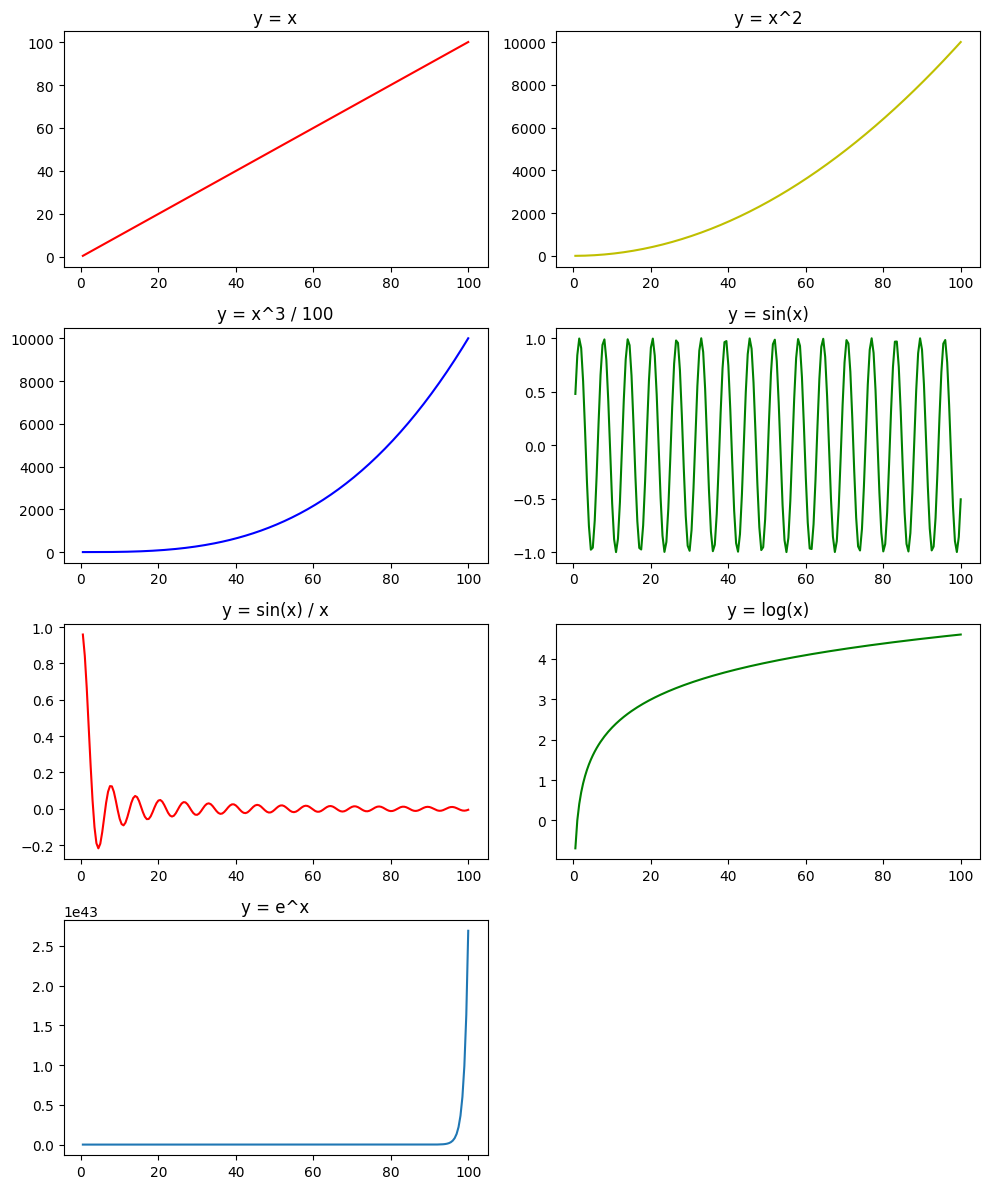

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the domain (x values)
x_values = np.arange(0.5, 100.1, 0.5)

# Define the functions
y1 = x_values
y2 = x_values**2
y3 = x_values**3 / 100
y4 = np.sin(x_values)
y5 = np.sin(x_values) / x_values
y6 = np.log(x_values)
y7 = np.exp(x_values)

# Plotting the functions
plt.figure(figsize=(10, 12))

# Subplot 1
plt.subplot(4, 2, 1)
plt.plot(x_values, y1,"r")
plt.title('y = x')

# Subplot 2
plt.subplot(4, 2, 2)
plt.plot(x_values, y2,"y")
plt.title('y = x^2')

# Subplot 3
plt.subplot(4, 2, 3)
plt.plot(x_values, y3,"b")
plt.title('y = x^3 / 100')

# Subplot 4
plt.subplot(4, 2, 4)
plt.plot(x_values, y4,"g")
plt.title('y = sin(x)')

# Subplot 5
plt.subplot(4, 2, 5)
plt.plot(x_values, y5,"r")
plt.title('y = sin(x) / x')

# Subplot 6
plt.subplot(4, 2, 6)
plt.plot(x_values, y6,"y")
plt.title('y = log(x)')

# Subplot 7
plt.subplot(4, 2, 7)
plt.plot(x_values, y7)
plt.title('y = e^x')

# Adjust layout for better visibility
plt.tight_layout()

# Show the plots
plt.show()


**Q-13 Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution**

In [ ]:
import numpy as np

def custom_argmin(arr):
    min_value = float('inf')  # initialize with positive infinity
    min_index = None

    for i, value in enumerate(arr):
        if value < min_value:
            min_value = value
            min_index = i

    return min_index

# Test the custom_argmin function
arr = np.array([5, 2, 8, 1, 6])
custom_result = custom_argmin(arr)

# Verify the result using np.argmin
numpy_result = np.argmin(arr)

print("Custom argmin result:", custom_result)
print("NumPy argmin result:", numpy_result)


Custom argmin result: 3
NumPy argmin result: 3


**Q-7 Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:
2022
Branch 1
Roll Number: 1, Name: N, Marks:
Maths: 100, English: 70 …
Branch 2
2023
Branch 1
Branch 2
2024
Branch 1
Branch 2
2025
Branch 1
Branch 2**

In [1]:
students_data = {
    2022: {
        'Branch 1': {
            1: {'Name': 'N', 'Marks': {'Maths': 100, 'English': 70}}
            # Add more students as needed
        },
        'Branch 2': {
            # Add students for Branch 2
        }
    },
    2023: {
        'Branch 1': {},
        'Branch 2': {}
    },
    2024: {
        'Branch 1': {},
        'Branch 2': {}
    },
    2025: {
        'Branch 1': {},
        'Branch 2': {}
    }
}

# Example: Accessing data
roll_number = 1
year = 2022
branch = 'Branch 1'
subject = 'Maths'

marks = students_data[year][branch][roll_number]['Marks'][subject]
print(f"Year: {year}, Branch: {branch}, Roll Number: {roll_number}, Marks in {subject}: {marks}")


Year: 2022, Branch: Branch 1, Roll Number: 1, Marks in Maths: 100


**Q-8 Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.**

In [ ]:
class Student:
    def __init__(self, roll_number, name):
        self.roll_number = roll_number
        self.name = name
        self.marks = {}

class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

# Database initialization
database = []

# Adding data to the database
year_2022 = Year(2022)

branch_1_2022 = Branch("Branch 1")
branch_1_2022.add_student(Student(1, "N"))
# Add more students as needed

branch_2_2022 = Branch("Branch 2")
# Add students for Branch 2

year_2022.add_branch(branch_1_2022)
year_2022.add_branch(branch_2_2022)

# Add more years and branches as needed

# Adding years to the database
database.append(year_2022)
# Add more years to the database

# Example: Accessing data
year = database[0]
branch = year.branches[0]
student = branch.students[0]

subject = 'Maths'
marks = student.marks.get(subject, None)
print(f"Year: {year.year}, Branch: {branch.name}, Roll Number: {student.roll_number}, Marks in {subject}: {marks}")


Year: 2022, Branch: Branch 1, Roll Number: 1, Marks in Maths: None
